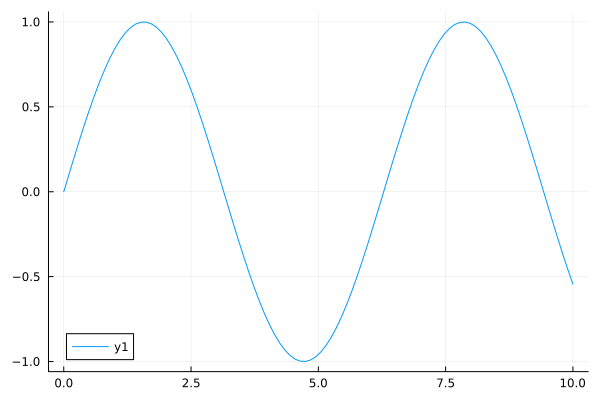

In [1]:
# funny sine graph
using Plots
x = range(0, 10, length=100)
y = sin.(x)
plot(x, y)

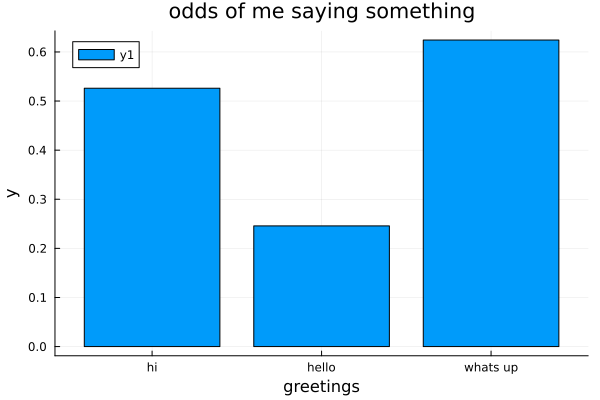

In [4]:
# funny bar graph
using Plots
x = ["hi", "hello", "whats up"]
y = rand(3)
p = bar(x, y)
ylabel!("y")
xlabel!("greetings")
title!("odds of me saying something")
display(p)
#savefig(p, "barplot.png")

In [1]:
# setup code
using Graphs: DiGraph
using StatsPlots
using Plots
include("Source/datasets.jl")
include("Source/QuasiStableCardinalityEstimator.jl")

get_exact_size (generic function with 1 method)

In [35]:
# load aids data
aids_data_file_path = "dataset/aids/aids.txt"
aids_data = load_dataset(aids_data_file_path)
datasets = [aids_data]
dataset_names = ["aids"]

# generate color summary
build_time = []
summary_size = []
color_summaries = []
for dataset in datasets
    results = @timed generate_color_summary(dataset, 64, verbose=true)
    push!(build_time, results[2])
    push!(summary_size,  get_color_summary_size(results[1]))
    push!(color_summaries, results[1])
end

Started coloring


Finished coloring
Started bloom filters
Finished bloom filters
Started cardinality counts


Finished cardinality counts
Started tracking statistics


Finished tracking statistics


In [4]:
# load human data
human_data_file_path = "dataset/human/human.txt"
human_data = load_dataset(human_data_file_path)
datasets = [human_data]
dataset_names = ["human"]

# generate color summary
build_time = []
summary_size = []
color_summaries = []
for dataset in datasets
    results = @timed generate_color_summary(dataset, 64, verbose=true)
    push!(build_time, results[2])
    push!(summary_size,  get_color_summary_size(results[1]))
    push!(color_summaries, results[1])
end

In [ ]:
# run queries?

In [ ]:
# graph stats about cycle probability given direction (HUMAN)
path_probability_pairs = color_summaries[1].cycle_probabilities
paths = keys(path_probability_pairs)
println("Number of paths: ", length(paths))
current_probabilities::Vector{Float64} = []
path_types::Vector{String} = []
current_index = 0
for path in paths
    current_path=""
    for direction in path
        current_path = current_path * ((direction) ? "f" : "b")
    end
    push!(path_types, current_path)
    push!(current_probabilities, path_probability_pairs[path])
    println(path_probability_pairs[path])
end
p = bar(path_types, current_probabilities)
xlabel!("Edge directions within path")
display(p)


making cycles
making paths


making cycles
making paths


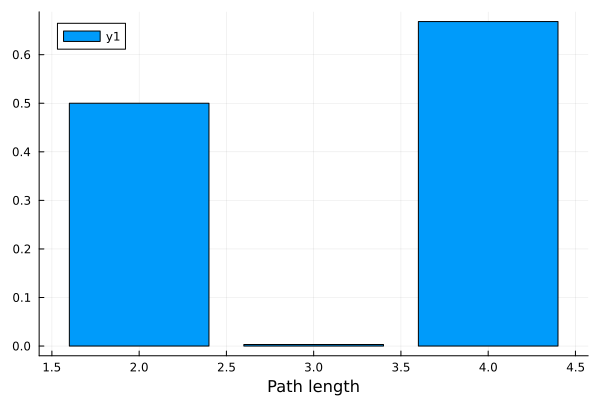

making cycles
making paths

In [36]:
# graph stats about cycle probability given distance
# steps:
# generate paths and cycles for each distance
# find the odds that those paths close
# graph (there should be only 3 bars)
likelihoods::Dict{Int, Float64} = Dict()
for i in 2:4
    likelihoods[i] = approximate_cycle_likelihood(i, aids_data)
end
cycle_sizes::Vector{Int} = []
cycle_likelihoods::Vector{Float64} = []
for size in keys(likelihoods)
    push!(cycle_sizes, size)
    push!(cycle_likelihoods, likelihoods[size])
end
p = bar(cycle_sizes, cycle_likelihoods)
xlabel!("Cycle size")
display(p)

Number of paths: 13


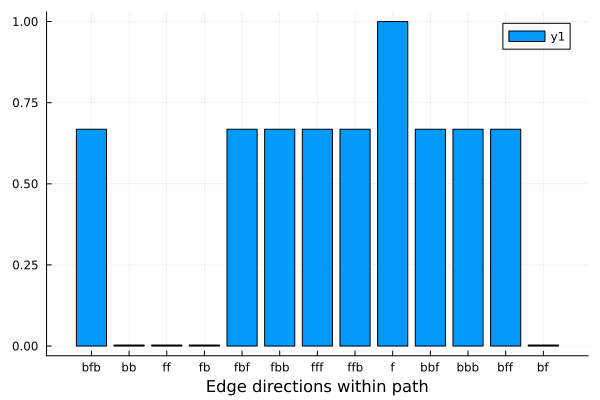

0.6682372084795457
0.003211568233472776
0.003211568233472776
0.003211568233472776
0.6682372084795457
0.6682372084795457
0.6682372084795457
0.6682372084795457
1.0
0.6682372084795457
0.6682372084795457
0.6682372084795457
0.003211568233472776


In [37]:
# graph stats about cycle probability given direction
path_probability_pairs = color_summaries[1].cycle_probabilities
paths = keys(path_probability_pairs)
println("Number of paths: ", length(paths))
current_probabilities::Vector{Float64} = []
path_types::Vector{String} = []
current_index = 0
for path in paths
    current_path=""
    for direction in path
        current_path = current_path * ((direction) ? "f" : "b")
    end
    push!(path_types, current_path)
    push!(current_probabilities, path_probability_pairs[path])
    println(path_probability_pairs[path])
end
p = bar(path_types, current_probabilities)
xlabel!("Edge directions within path")
display(p)


In [ ]:
# graph stats about cycle probability given colors of in path
# steps:

# for all colors, find all possible combinations of colors in a path
# - i.e. if there are 3 colors, the possible combinations for a 3-cycle path are 1, 2, 3, 1 or 1, 3, 2, 1, etc.
# also keep track of directionality?
# remove combinations that lead to a node pointing to itself?

# for each color combination, create all the possible path graphs, changing based on directionality of edges

# create a mapping of colors -> set of data labels under that color

# create a new version of the exact size method that uses sets of data labels (rather than singular data label
# from query) to restrict each node in the query

# calculate the exact size for each graph of a certain size for the specified color combination

# store the color combinations?

# main issue: if there are n colors, and a cycle has v vertices, there are n!/v! possible combinations of colors for a given cycle size
# combine that with there being 2^(v-1) different cycles with the same v number of vertices...
# so we end up calculating n!/v! * 2^(v-1) different numbers for just one cycle size v.

# possible different approach (that also takes into account central nodes that are more likely to be connected): 
# just use the starting node color and the cycle size?

# keep track of starting and ending color
# - use the data graph and the color hash to find the set of data labels for which the node must start / end from


In [ ]:
# graph stats about colors in path